# Plotando resultados obtidos com Random Forest

In [1]:
import matplotlib.pyplot as plt
import os
import pickle
%matplotlib notebook

In [2]:
# Arquivos com resultados obtidos com Random Forest & Otimização Gaussiana
dir_results = '../results/random_forest'
path_no_aug = os.path.join(dir_results, 'results_rf_sem_data_aug.pickle')
path_aug_gaussian = os.path.join(dir_results, 'results_rf_data_aug_gaussiano.pickle')
path_aug_salt_pepper = os.path.join(dir_results, 'results_rf_data_aug_saltpepper.pickle')

In [3]:
def show_results(dict_with_results):
    # Carrega métricas ao longo dos 
    accuracy_train = dict_with_results['results_train_val_set'][:,0]
    accuracy_validation = dict_with_results['results_train_val_set'][:,1]
    trees = dict_with_results['results_train_val_set'][:,2]
    max_depth = dict_with_results['results_train_val_set'][:,3]
    TP = dict_with_results['results_train_val_set'][:,4]
    FP = dict_with_results['results_train_val_set'][:,5]
    FN = dict_with_results['results_train_val_set'][:,6]
    TN = dict_with_results['results_train_val_set'][:,7]
    precision = dict_with_results['results_train_val_set'][:,8]
    recall = dict_with_results['results_train_val_set'][:,9]
    f1 = dict_with_results['results_train_val_set'][:,10]
    # Plota gráficos
    fig = plt.figure()
    ax1 = fig.add_subplot(2, 1, 1)
    # Árvores testadas x profundidades vs. acurácia no treino
    ax1.set_title('Tested Trees x Max Depth (accuracy on training set)')
    sc1 = ax1.scatter(trees, max_depth, c=accuracy_train, s=10, cmap='autumn')
    ax1.set_xlabel('trees')
    ax1.set_ylabel('max_depth')
    colorbar = fig.colorbar(sc1, ax=ax1)
    # Árvores testadas x profundidades vs. acurácia na validação
    ax2 = fig.add_subplot(2, 1, 2)
    ax2.set_title('Tested Trees x Max Depth (accuracy on validation)')
    sc2 = ax2.scatter(trees, max_depth, c=accuracy_validation, s=100, cmap='autumn')
    ax2.set_xlabel('trees')
    ax2.set_ylabel('max_depth')
    colorbar = fig.colorbar(sc2, ax=ax2)
    fig.tight_layout()
    fig.show()
    # Mostra métricas obtidas no teste
    print(f'Detalhes do classificador final: {dict_with_results["final_classifier"]}')
    print(f'Melhor acurácia no treino: {100*accuracy_train.max():.6f}%')
    print('Resultado no teste:')
    print(f'\tAcurácia: {100*dict_with_results["metrics_test_set"]["accuracy"]:.2f}%')
    print(f'\tPrecision: {dict_with_results["metrics_test_set"]["precision"]}')
    print(f'\tRecall: {dict_with_results["metrics_test_set"]["recall"]}')
    print(f'\tRecall: {dict_with_results["metrics_test_set"]["f1"]}')

--------------------------

### Sem adição de ruídos

<IPython.core.display.Javascript object>


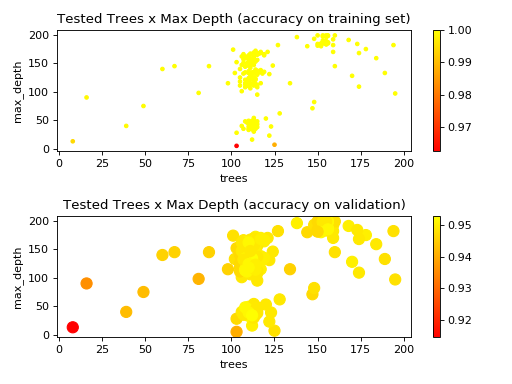

Detalhes do classificador final: RandomForestClassifier(max_depth=49, n_estimators=112, random_state=123)
Melhor acurácia no treino: 100.000000%
Resultado no teste:
	Acurácia: 94.04%
	Precision: 0.9414414414414415
	Recall: 0.9393258426966292
	Recall: 0.9403824521934758


In [4]:
# Mostra resultados sem ruídos
no_aug_res = pickle.load(open(path_no_aug, 'rb'))
show_results(no_aug_res)

--------------------------

### Com adição de ruído gaussiano

<IPython.core.display.Javascript object>


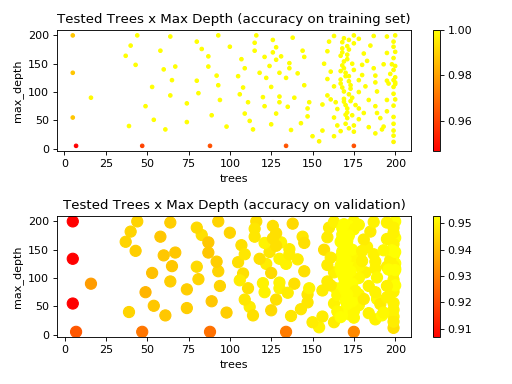

Detalhes do classificador final: RandomForestClassifier(max_depth=128, n_estimators=170, random_state=123)
Melhor acurácia no treino: 100.000000%
Resultado no teste:
	Acurácia: 93.93%
	Precision: 0.9354120267260579
	Recall: 0.9438202247191011
	Recall: 0.9395973154362417


In [5]:
# Mostra resultados com ruido gaussiano
aug_gaussian_res = pickle.load(open(path_aug_gaussian, 'rb'))
show_results(aug_gaussian_res)

--------------------------

### Com adição de ruído salt and pepper

<IPython.core.display.Javascript object>


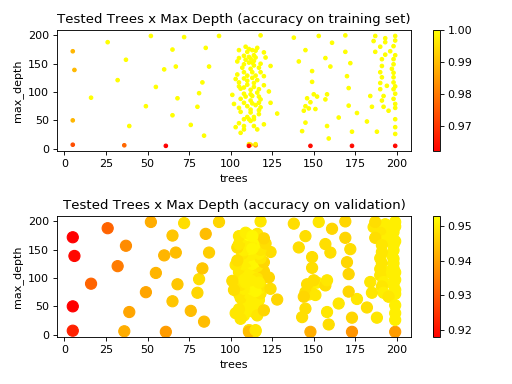

Detalhes do classificador final: RandomForestClassifier(max_depth=52, n_estimators=111, random_state=123)
Melhor acurácia no treino: 100.000000%
Resultado no teste:
	Acurácia: 94.16%
	Precision: 0.9356984478935698
	Recall: 0.9483146067415731
	Recall: 0.9419642857142857


In [6]:
# Mostra resultados com ruído salt and pepper
aug_saltpepper_res = pickle.load(open(path_aug_salt_pepper, 'rb'))
show_results(aug_saltpepper_res)

---------------------------

## Conclusões

* Como esperado, o Random Forest tende a apresentar overfitting durante o treino. Isto é notado em todos  experimentos (dados sem ruídos e com ruídos).

* Quando ruídos foram inseridos nas imagens de treino, o treinamento apresentou pontos com acurácias mais baixas do que no caso sem ruídos: Notam-se acurácias próximas de 95% com ruído gaussiano; e de 96% com ruídos sal e pimenta. Isto mostra que a adição de ruídos dificultou bem pouco o treinamento.

* Na validação com ruído sal e pimenta, 2 regiões de árvores apresentaram acurácias mais altas: regiões com cerca de 115 árvores e com 200 árvores.

* No final as acurácias obtidas no teste ficaram:

Sem adição de ruídos: 94.04%
Com adição de ruído gaussiano: 93.93%
Com adição de ruído sal e pimenta: 94.16%

A adição de ruídos não foi suficiente para aumentar muito a robustez do classificador.